In [ ]:
# write mouse info and kind of stimulation

mouse_id = "mouse-id"
stim = 1
# visual oddball - 0
# visual angle   - 1
# elect hind paw - 2

In [ ]:
# import images after registration

import numpy as np
import os
from wfield import *
import tifffile as tiff

folder_path = "img-after-registration_dir"

# add days of your experiments
day_list = [
            "day1",
#            "day2",
#            "day3",
            ]

# add your experiment IDs
experiments_list = [
                    "ex1",
#                    "ex2",
#                    "ex3",
                    ]

dat1 = np.load(os.path.join(pjoin(folder_path, f"{day_list[0]}_GCaMP/{experiments_list[0]}/dat/all"), f"{experiments_list[0]}_10ex.npy"))       #delete th index
#dat2 = np.load(os.path.join(pjoin(folder_path, f"{day_list[1]}_GCaMP/{experiments_list[1]}/dat/all"), f"{experiments_list[1]}_10ex.npy"))        #delete th index
#dat3 = np.load(os.path.join(pjoin(folder_path, f"{day_list[2]}_GCaMP/{experiments_list[2]}/dat/all"), f"{experiments_list[2]}_10ex.npy"))       #delete th index

print(dat1.shape)

(16000, 256, 270)


In [ ]:
# stack images

dat = dat1
#dat = np.concatenate((dat1, dat2, dat3), axis=0)  # if you have multiple experiments

print(dat.shape)

(48000, 256, 270)


In [ ]:
# delete imported images before stack

del dat1
#del dat1, dat2, dat3

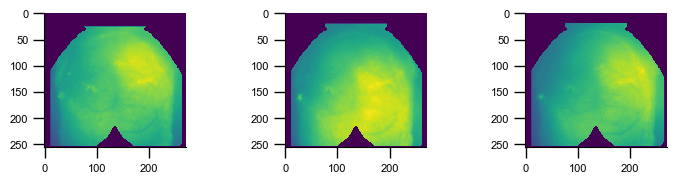

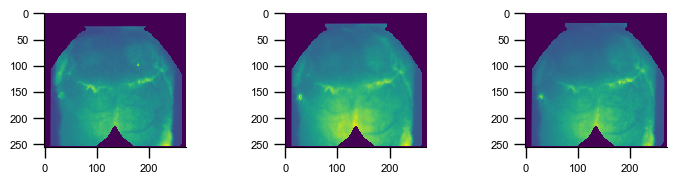

In [ ]:
# show images from all experiments

import matplotlib.pyplot as plt

frames = 1600
ex_num = 10  # experiments per day

plt.figure(figsize=(15, 8))  # width 15 inch, height 8 inch
for ex in range(len(experiments_list)):  # Start from 1 and end at 15 (inclusive)
  plt.subplot(4, 5, ex+1)
  plt.imshow(dat[ex*ex_num*frames])
  # ... rest of your code
plt.show()

plt.figure(figsize=(15, 8))  # width 15 inch, height 8 inch
for ex in range(len(experiments_list)):  # Start from 1 and end at 15 (inclusive)
  plt.subplot(4, 5, ex+1)
  plt.imshow(dat[(ex+1)*ex_num*frames-1])
  # ... rest of your code
plt.show()

In [ ]:
# make common mask

frames, H, W = dat.shape
mask = np.zeros((H, W), dtype=bool)
for i in range(frames):
    mask |= (dat[i] == 0)

for i in range(frames):
    frame = dat[i]
    frame[mask] = 0

print(dat.shape)

(48000, 256, 270)


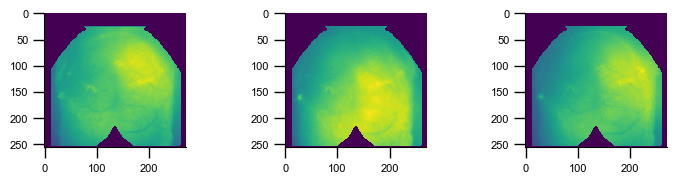

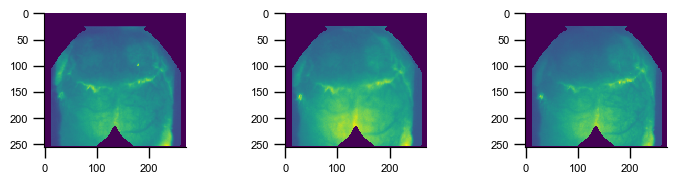

In [ ]:
# show images after mask

import matplotlib.pyplot as plt

frames = 1600
ex_num = 10
plt.figure(figsize=(15, 8))  # width 15 inch, height 8 inch
for ex in range(len(experiments_list)):  # Start from 1 and end at 15 (inclusive)
  plt.subplot(4, 5, ex+1)
  plt.imshow(dat[ex*ex_num*frames])
  # ... rest of your code
plt.show()

plt.figure(figsize=(15, 8))  # width 15 inch, height 8 inch
for ex in range(len(experiments_list)):  # Start from 1 and end at 15 (inclusive)
  plt.subplot(4, 5, ex+1)
  plt.imshow(dat[(ex+1)*ex_num*frames-1])
  # ... rest of your code
plt.show()

In [ ]:
# make folder for saving images

import os
from wfield import *

analysis_folder = "analysis_folder_name"

os.mkdir("mother_dir")
os.mkdir(f"mother_dir/{analysis_folder}")

base_path = f"mother_dir/{analysis_folder}"
path = pjoin(base_path, "dat")
os.mkdir(path)

In [ ]:
# save images with each cycle

import tifffile as tiff
from wfield import *
import tqdm

frames = 1600

ex_in1 = int(dat.shape[0] / frames)
for ex in tqdm.tqdm(range(ex_in1)):
    subfolder = pjoin(path, f"ex{ex}")
    os.mkdir(subfolder)
    file_path = os.path.join(subfolder, f"ex{ex}.tif")
    tiff.imwrite(file_path, dat[ex*frames:(ex+1)*frames])
    file_path_np = os.path.join(subfolder, f"ex{ex}.npy")
    np.save(file_path_np, dat[ex*frames:(ex+1)*frames])

100%|██████████| 30/30 [02:08<00:00,  4.28s/it]


In [ ]:
# save 1st frame

import tifffile as tiff

image_path = os.path.join(path, f"{analysis_folder}_1f.tif")
tiff.imwrite(image_path, dat[0])

In [ ]:
# make function to visualize activities of ROIs you want to see in 1 cycle

import numpy as np
import matplotlib.pyplot as plt

def roi_setting(img_array):

    time_steps, height, width = img_array.shape

    roi1 = np.zeros((height, width), dtype=bool)
    roi1[200:230, 180:210] = 1  # (y, x)

    rois = [roi1]

    roi_means = []
    for roi in rois:
        mean_values = np.array([np.mean(frame[roi]) for frame in img_array])
        roi_means.append(mean_values)

    roi_means = np.array(roi_means)

    print("average time course in ROIs:", roi_means.shape)  # (ROIs, frames)

    plt.figure(figsize=(6, 6))
    plt.imshow(img_array[0], cmap='gray', interpolation='nearest')

    for idx, roi in enumerate(rois):
        #plt.contour(roi, colors=[f'C{idx}'], linewidths=1.5, label=f'ROI {idx + 1}')
        plt.contour(roi, colors='red', linewidths=3, label=f'ROI {idx + 1}')

    plt.show()

    return roi_means

In [ ]:
# make function to visualize activities of a ROI you want to see in your whole experient

import numpy as np
import matplotlib.pyplot as plt

frames = 800

def roi_calc(img_array):
    time_steps, height, width = img_array.shape
    roi = np.zeros((height, width), dtype=bool)
    roi[200:230, 180:210] = 1  # (y, x)
    mean_values = np.array([np.mean(frame[roi]) for frame in img_array])

    return mean_values

In [ ]:
# set time frames

# start time
start_value = 0.0

# increase per frames
increment = 0.05

# frames
count = 800

t = [start_value + i * increment for i in range(count)]

In [ ]:
# show your ROIs and ΔF/F with blue and violet excitation in your 1 experiment

roi_means = roi_setting(dat[:2*frames][::2])
roi_means2 = roi_setting(dat[:2*frames][1::2])
for i in range(roi_means.shape[0]):
    norm_roi_470 = (roi_means[i][:frames]-np.mean(roi_means[i][:frames])) / np.mean(roi_means[i][:frames])
    plt.plot(t[:frames], norm_roi_470, color='blue')
    norm_roi_405 = (roi_means2[i][:frames]-np.mean(roi_means2[i][:frames])) / np.mean(roi_means2[i][:frames])
    plt.plot(t[:frames], norm_roi_405, color='darkviolet')
    if stim == 0:
        for set in range(16):
                plt.axvspan(set+0.5, set+1, color='black', alpha=0.3)
        for set in range(16, 40):
            plt.axvspan(set+0.5, set+1, color='blue', alpha=0.3)
        for dev in range(3):
            plt.axvspan(dev*8+21.5, dev*8+22, color='red', alpha=0.3)
    if stim == 1:
        plt.axvspan(20, 30, color='red', alpha=0.3)
    if stim == 2:
        plt.axvspan(20, 20.5, color='red', alpha=0.3)

    #plt.axvspan(20, 30, color='red', alpha=0.3)
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(t[:frames], norm_roi_470, color='blue')
    ax.plot(t[:frames], norm_roi_405, color='darkviolet')

    if stim == 0:
        for set in range(11):
            plt.axvspan(set+0.5, set+1, color='black', alpha=0.3)
        for set in range(11, 34):
            plt.axvspan(set+0.5, set+1, color='blue', alpha=0.3)
        for dev in range(3):
            plt.axvspan(dev*8+16.5, dev*8+17, color='red', alpha=0.3)
    if stim == 1:
        plt.axvspan(20, 30, color='red', alpha=0.3)
    if stim == 2:
        plt.axvspan(20, 20.5, color='red', alpha=0.3)
    #plt.axvspan(20, 30, color='red', alpha=0.3)

    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

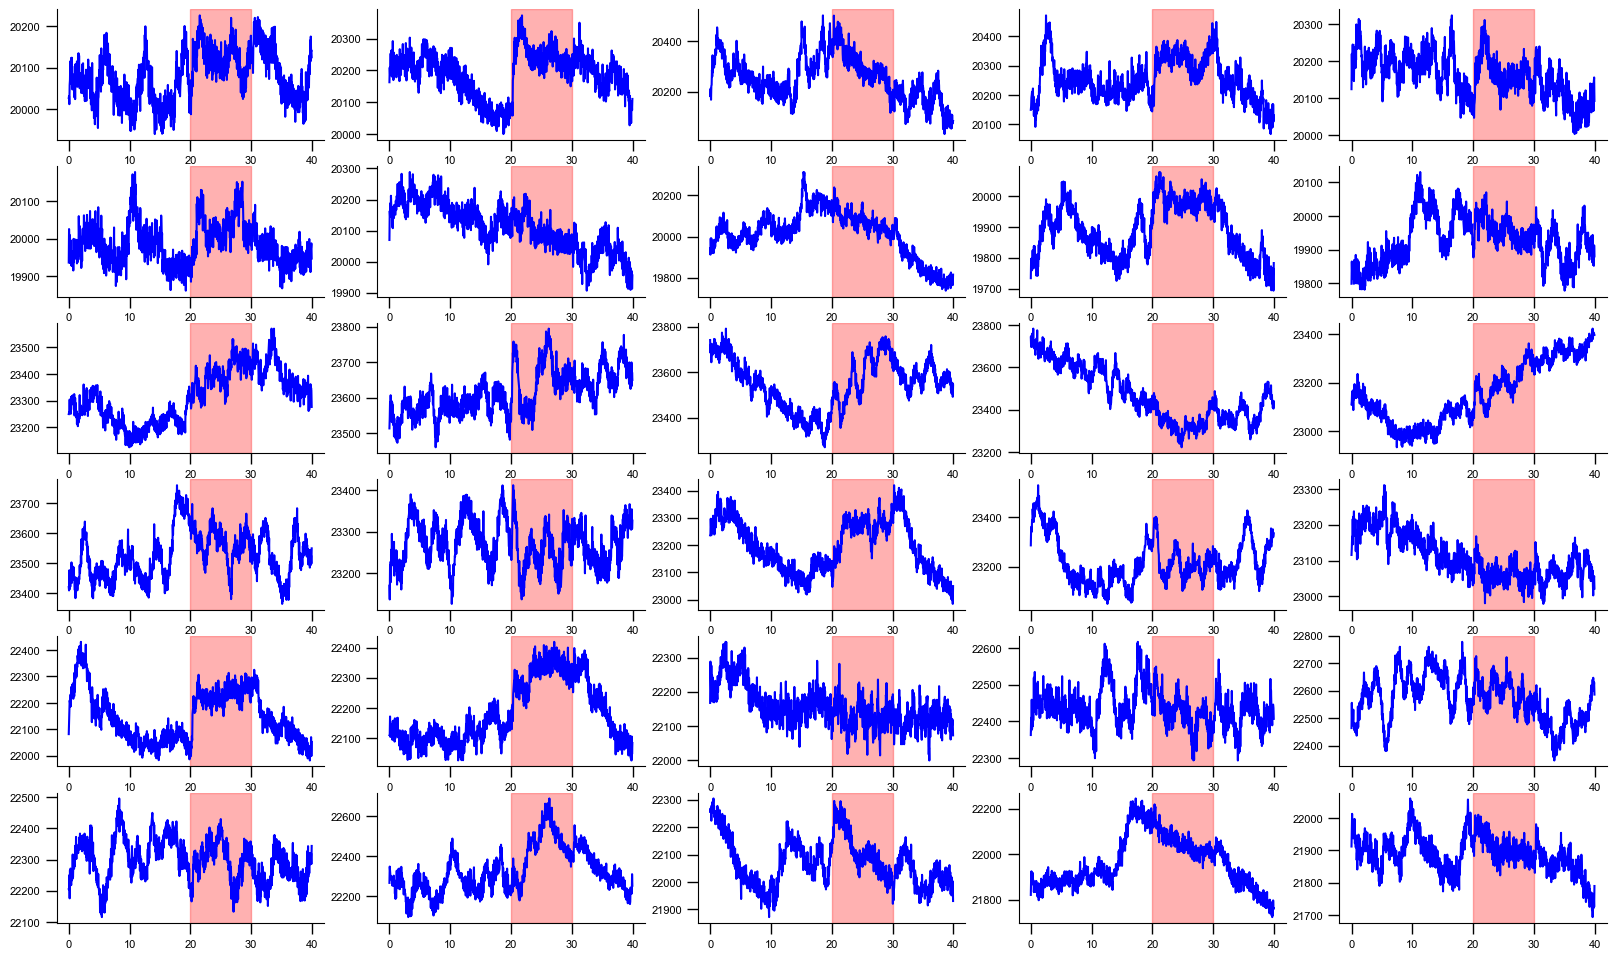

In [ ]:
# show fluorescence of your ROI with blue excitation in your whole experiment

plt.figure(figsize=(20, 20))  # width 15 inch, height 8 inch

for ex in range(int(dat.shape[0]/(frames*2))):
    mean_values = roi_calc(dat[ex*frames*2:(ex+1)*frames*2][::2])
    plt.subplot(10, 5, ex+1)
    plt.plot(t[:frames], mean_values, color='blue')
    if stim == 0:
        for set in range(16):
                plt.axvspan(set+0.5, set+1, color='black', alpha=0.3)
        for set in range(16, 40):
            plt.axvspan(set+0.5, set+1, color='blue', alpha=0.3)
        for dev in range(3):
            plt.axvspan(dev*8+21.5, dev*8+22, color='red', alpha=0.3)
    if stim == 1:
        plt.axvspan(20, 30, color='red', alpha=0.3)
    if stim == 2:
        plt.axvspan(20, 20.5, color='red', alpha=0.3)
    #plt.ylim(22000, 24000)

plt.show()

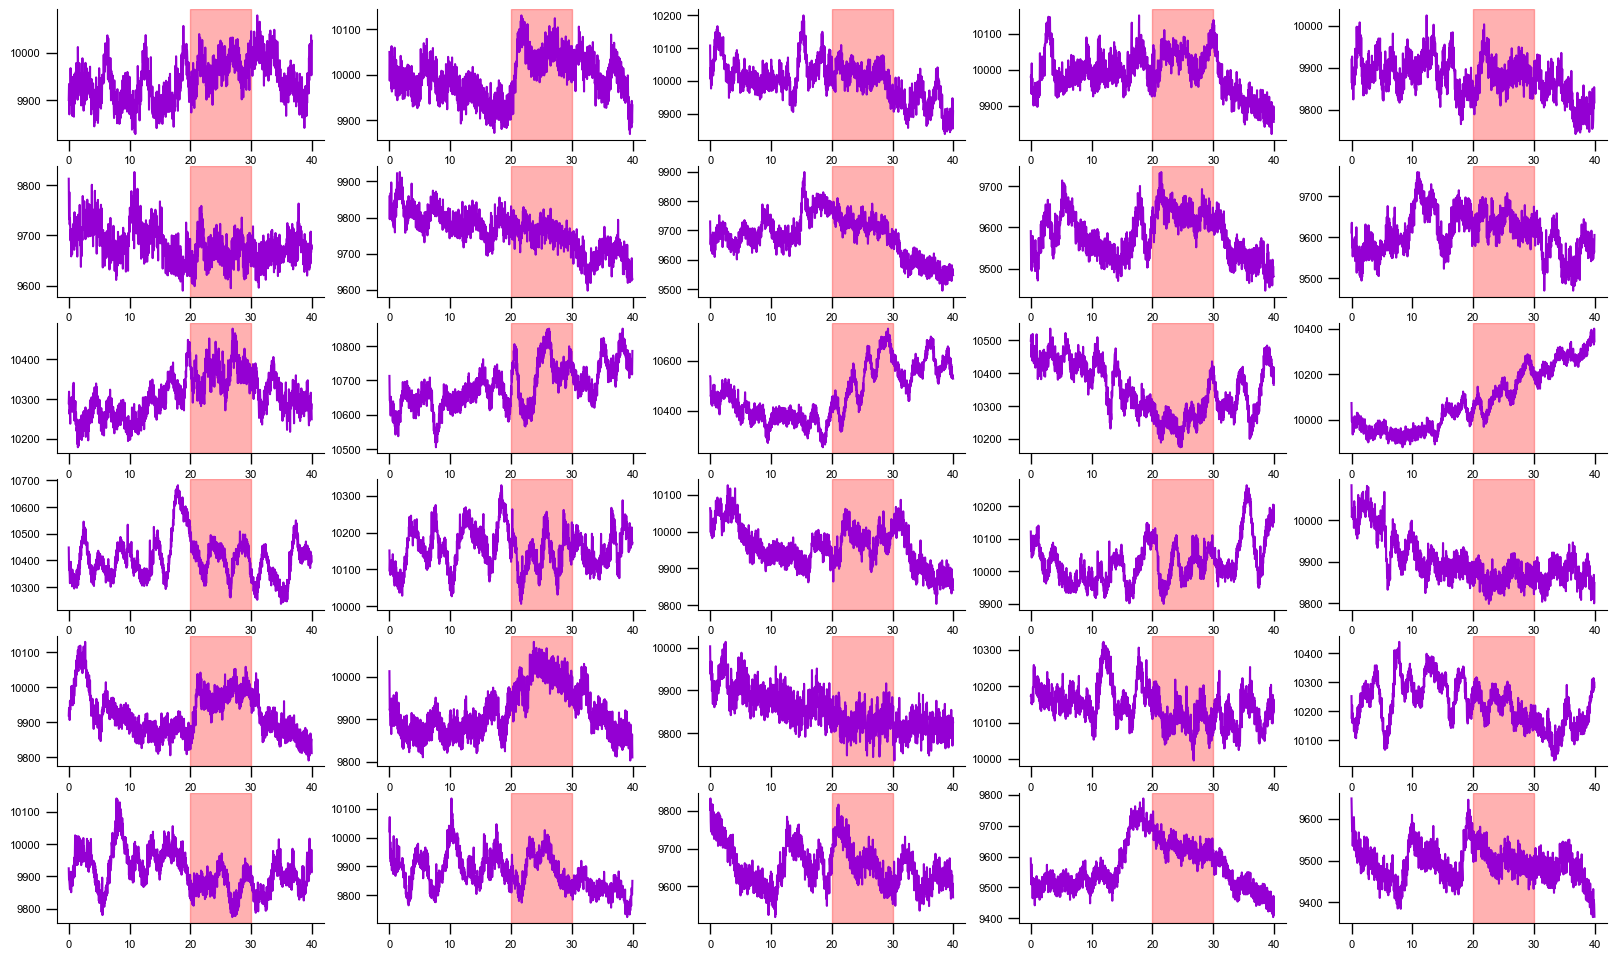

In [ ]:
# show fluorescence of your ROI for violet excitation in your whole experiment

plt.figure(figsize=(20, 20))  # width 15 inch, height 8 inch

for ex in range(int(dat.shape[0]/(frames*2))):
    mean_values = roi_calc(dat[ex*frames*2:(ex+1)*frames*2][1::2])
    plt.subplot(10, 5, ex+1)
    plt.plot(t[:frames], mean_values, color='darkviolet')
    if stim == 0:
        for set in range(16):
                plt.axvspan(set+0.5, set+1, color='black', alpha=0.3)
        for set in range(16, 40):
            plt.axvspan(set+0.5, set+1, color='blue', alpha=0.3)
        for dev in range(3):
            plt.axvspan(dev*8+21.5, dev*8+22, color='red', alpha=0.3)
    if stim == 1:
        plt.axvspan(20, 30, color='red', alpha=0.3)
    if stim == 2:
        plt.axvspan(20, 20.5, color='red', alpha=0.3)
    #plt.ylim(14000, 16000)

plt.show()

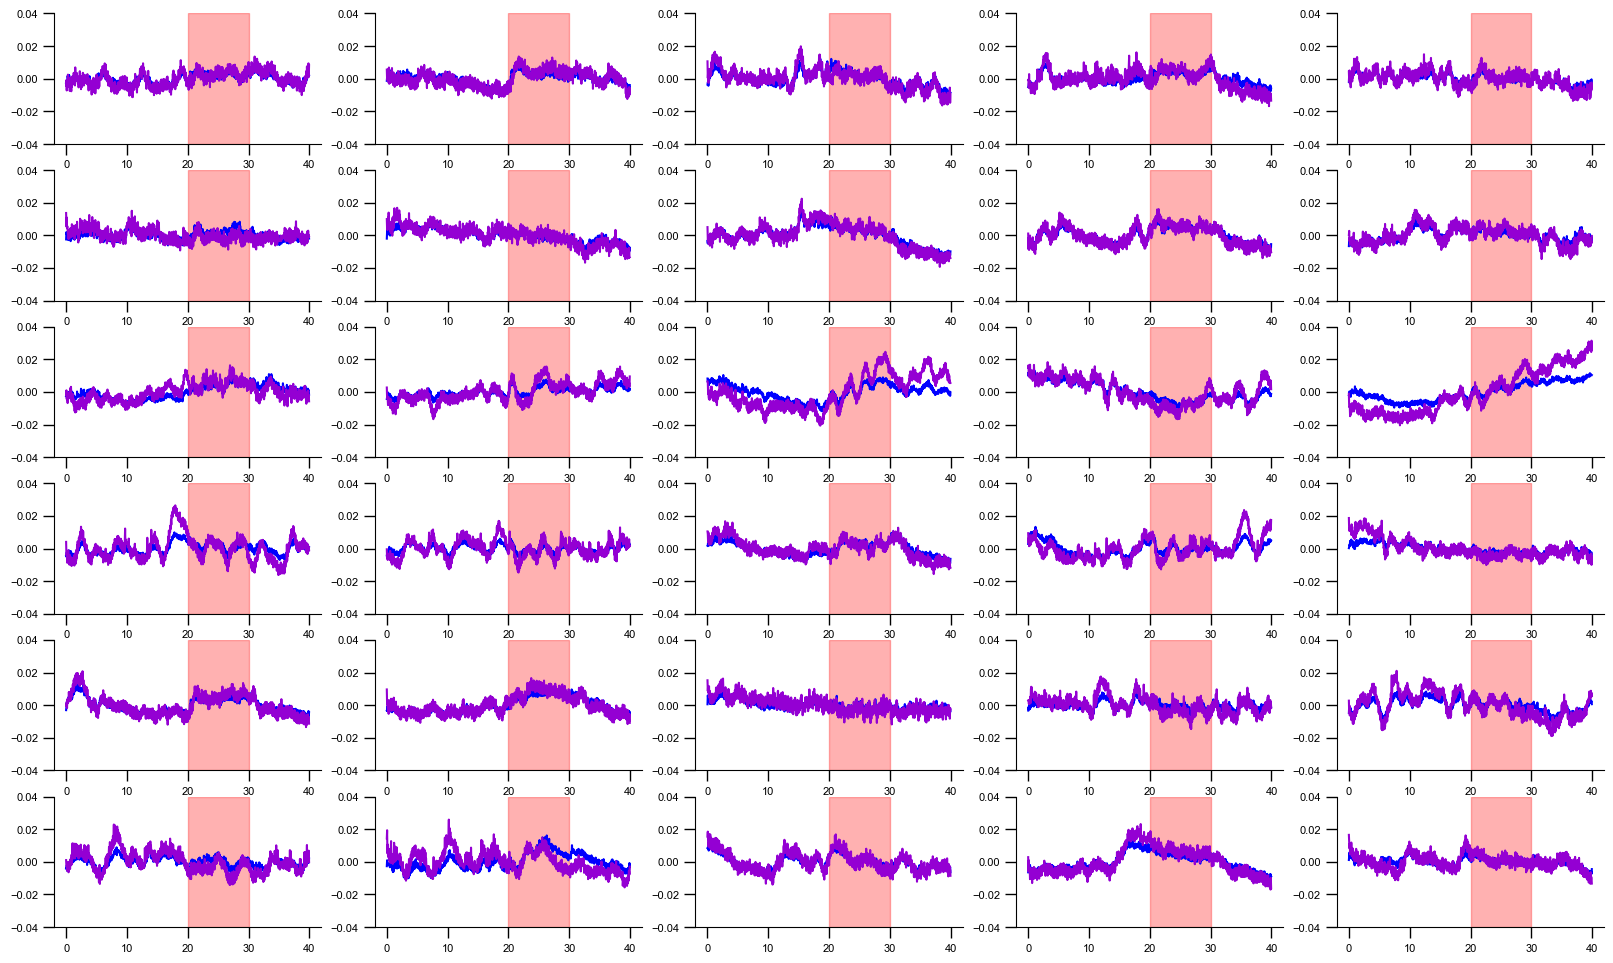

In [ ]:
# show ΔF/F of your ROI for violet excitation in your whole experiment

plt.figure(figsize=(20, 20))  # width 15 inch, height 8 inch

for ex in range(int(dat.shape[0]/(frames*2))):
    mean_values = roi_calc(dat[ex*frames*2:(ex+1)*frames*2][::2])
    norm_470 = (mean_values-np.mean(mean_values)) / np.mean(mean_values)

    mean_values2 = roi_calc(dat[ex*frames*2:(ex+1)*frames*2][1::2])
    norm_405 = (mean_values2-np.mean(mean_values2)) / np.mean(mean_values2)

    plt.subplot(10, 5, ex+1)
    plt.plot(t[:frames], norm_470, color='blue')
    plt.plot(t[:frames], norm_405, color='darkviolet')
    if stim == 0:
        for set in range(16):
                plt.axvspan(set+0.5, set+1, color='black', alpha=0.3)
        for set in range(16, 40):
            plt.axvspan(set+0.5, set+1, color='blue', alpha=0.3)
        for dev in range(3):
            plt.axvspan(dev*8+21.5, dev*8+22, color='red', alpha=0.3)
    if stim == 1:
        plt.axvspan(20, 30, color='red', alpha=0.3)
    if stim == 2:
        plt.axvspan(20, 20.5, color='red', alpha=0.3)
    plt.ylim(-0.04, 0.04)

plt.show()